In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt

In [2]:
data = pd.read_csv("BAJFINANCE.csv")
#Since we need to predict the price of the stock using time series analysis, the VWAP (volume weighted)
#average price of the stock is going to be the dependent feature that we will predict
#Since we have a time-series use case in the project, we will have to perform wrangling on the data
#with respect to the appropriate time series indices.
#We will assign the index on the Date feature

In [3]:
data.set_index("Date", inplace = True)

<Axes: xlabel='Date'>

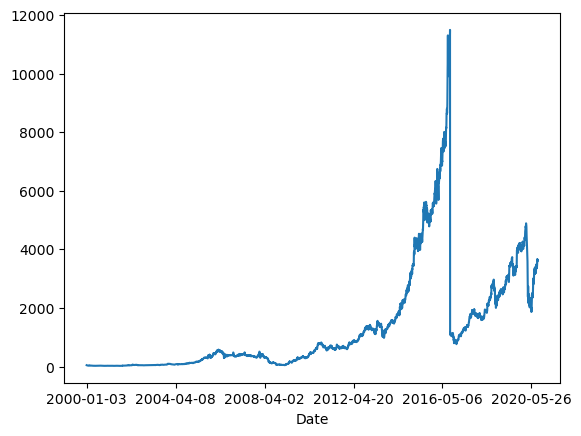

In [4]:
data['VWAP'].plot() #analyze fluctuation of price using the visual - there is a seasonality to the VWAP
#because mean and standard deviation are not constant throughout the data
#As a result, we will need to use feature engineering

In [5]:
#Checking for missing values in the dataframe
data.isnull().sum() #most missing values are in the Trades feature(2779), followed by Deliverable Volume
#(446), followed by %Deliverable (446)


Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [6]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

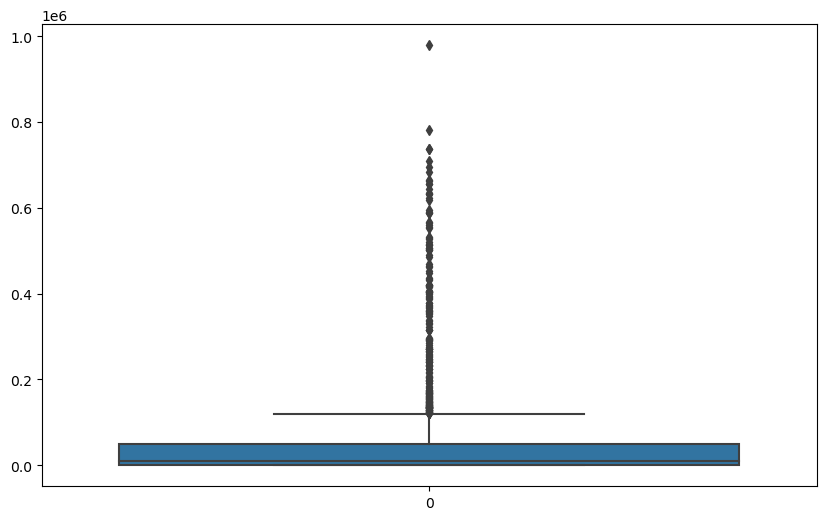

In [7]:
#checking whether to use mean, median, or mode to impute for the Trades column

fig, ax = mlt.subplots(figsize = (10, 6))
sns.boxplot(data['Trades']) #Since there are too many outliers, these would impact the mean. As a result, mean imputation is 
#not a good idea
#

<Axes: xlabel='Trades', ylabel='Density'>

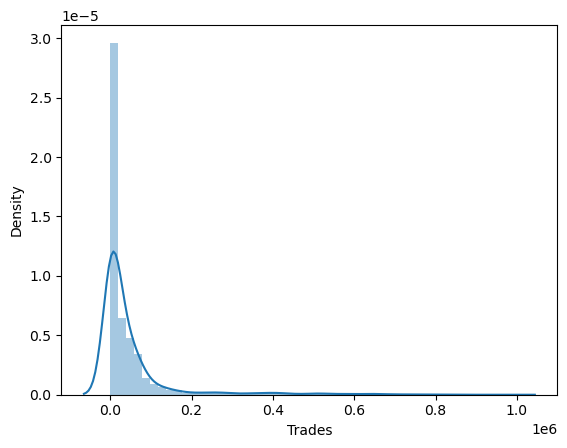

In [8]:
# Distribution plot
#
sns.distplot(data['Trades']) #right skewed distribution

In [9]:
#checking if imputing with mode is a good idea:
data['Trades'] #since the values in this feature are numerical with a large number of unique values, mode imputation is not a good
#idea as well

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2020-08-25    339815.0
2020-08-26    213994.0
2020-08-27    162374.0
2020-08-28    137033.0
2020-08-31    293454.0
Name: Trades, Length: 5070, dtype: float64

In [10]:
data['Trades'] = data['Trades'].fillna(data['Trades'].median())

In [11]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.50,50.75,50.75,50.05,7600,3.803800e+10,9603.0,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.90,48.00,48.10,48.56,5000,2.428000e+10,9603.0,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.60,44.60,44.60,45.47,3500,1.591450e+10,9603.0,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.10,46.00,45.25,44.43,6200,2.754750e+10,9603.0,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.00,42.90,42.90,44.44,3500,1.555550e+10,9603.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


In [12]:
#We will do the same for Deliverable Volume and %Deliverable: because since the values in this feature are numerical 
#with a large number of unique values, mode imputation is not a good idea. And high level of outliers will impact the mean
data['Deliverable Volume'] = data['Deliverable Volume'].fillna(data['Deliverable Volume'].median())
data['%Deliverble'] = data['%Deliverble'].fillna(data['%Deliverble'].median())

In [13]:
data.head(10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,9603.0,13819.5,0.68195
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,9603.0,13819.5,0.68195
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,9603.0,13819.5,0.68195
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,9603.0,13819.5,0.68195
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,9603.0,13819.5,0.68195
2000-01-10,BAJAUTOFIN,EQ,42.90,42.05,44.90,41.0,43.00,42.90,42.47,4700,1.996100e+10,9603.0,13819.5,0.68195
2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.5,40.25,40.10,40.25,5500,2.213900e+10,9603.0,13819.5,0.68195
2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.0,39.00,39.00,39.80,1000,3.980000e+09,9603.0,13819.5,0.68195
2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.5,39.50,39.50,39.37,1000,3.937000e+09,9603.0,13819.5,0.68195


In [14]:
data.isnull().sum() #now, no more missing values

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [15]:
data.shape

(5070, 14)

In [16]:
df = data.copy()

In [17]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [18]:
#Data preparation for time series forecasting using feature engineering
df.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [19]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades'] #contain all lagging features
window1 = 3
window2 = 7

In [20]:
#iterate on each feature of lag_features, then perform a rolling concept or moving average concept depending on the features we have
for feature in lag_features:
    df[feature+"_rolling_mean_3"] = df[feature].rolling(window = window1).mean() #roll on the basis of the first window
    df[feature+"_rolling_mean_7"] = df[feature].rolling(window = window2).mean() #roll on the basis of the second window


In [21]:
for feature in lag_features:
    df[feature+"_rolling_std_3"] = df[feature].rolling(window = window1).std() #roll on the basis of the first window
    df[feature+"_rolling_std_7"] = df[feature].rolling(window = window2).std() #roll on the basis of the second window


In [22]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,0.0,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,...,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,0.0,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,...,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,0.0,NaN


In [23]:
df.columns #VWAP will be more efficient to predict when we have the rolling means and standard deviations
df.shape

(5070, 34)

In [24]:
df.isnull().sum() #since we have a very small number of NA values, we can simply drop them

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_mean_7        6
Low_rolling_mean_3         2
Low_rolling_mean_7         6
Volume_rolling_mean_3      2
Volume_rolling_mean_7      6
Turnover_rolling_mean_3    2
Turnover_rolling_mean_7    6
Trades_rolling_mean_3      2
Trades_rolling_mean_7      6
High_rolling_std_3         2
High_rolling_std_7         6
Low_rolling_std_3          2
Low_rolling_std_7          6
Volume_rolling_std_3       2
Volume_rolling_std_7       6
Turnover_rolling_std_3     2
Turnover_rolling_std_7     6
Trades_rolling_std_3       2
Trades_rolling_std_7       6
dtype: int64

In [25]:
df.dropna(inplace = True)

In [26]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,High_rolling_std_3,High_rolling_std_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,BAJAUTOFIN,EQ,42.90,42.00,42.00,39.50,40.25,40.10,40.25,5500,...,3.000556,3.709528,1.258306,3.052712,1.006645e+03,1.466125e+03,3.353967e+09,7.780466e+09,0.000000,0.000000
2000-01-12,BAJAUTOFIN,EQ,40.10,40.00,40.00,39.00,39.00,39.00,39.80,1000,...,2.463737,4.300664,1.040833,3.087610,2.400694e+03,1.722401e+03,9.915353e+09,7.711740e+09,0.000000,0.000000
2000-01-13,BAJAUTOFIN,EQ,39.00,40.00,41.00,38.50,39.50,39.50,39.37,1000,...,1.000000,3.191880,0.500000,2.146980,2.598076e+03,2.045902e+03,1.049654e+10,8.903806e+09,0.000000,0.000000
2000-01-14,BAJAUTOFIN,EQ,39.50,39.00,40.50,39.00,39.90,39.90,39.72,1700,...,0.500000,3.097849,0.288675,1.513117,4.041452e+02,2.173871e+03,1.612971e+09,9.499372e+09,0.000000,0.000000
2000-01-17,BAJAUTOFIN,EQ,39.90,39.05,41.00,38.40,39.20,39.20,39.84,3100,...,0.288675,2.915721,0.321455,1.359797,1.069268e+03,1.782053e+03,4.282258e+09,7.480525e+09,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,111.840660,89.327396,69.777271,61.471880,3.613401e+06,2.348888e+06,1.315344e+15,8.608028e+14,125273.490429,81831.863468
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,100.081633,116.819954,115.027609,100.638138,1.987080e+06,2.403611e+06,7.237865e+14,8.886997e+14,74234.798338,82982.637290
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,25.064982,122.216500,62.320569,111.614377,2.641848e+06,2.408580e+06,9.306171e+14,8.850381e+14,91269.616085,82597.470913


In [27]:
ind_features = ['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'] #all the independent features

In [28]:
#Create training and testing data
#Since we are following a time series, we cannot randomly split the data into training and testing data
#80 percent training and testing split
train = df[0: 4000]
test = df[4000:]

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [34]:

train_arima = train['VWAP']
test_arima = test['VWAP']


history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

In [35]:
history

[40.25,
 39.8,
 39.37,
 39.72,
 39.84,
 39.2,
 40.57,
 43.68,
 42.63,
 41.3,
 38.41,
 39.38,
 38.55,
 37.25,
 36.71,
 36.01,
 37.66,
 37.69,
 39.09,
 38.48,
 41.67,
 43.91,
 48.73,
 47.09,
 41.69,
 40.54,
 40.69,
 40.5,
 39.67,
 39.31,
 40.18,
 40.88,
 41.46,
 39.74,
 39.6,
 40.38,
 38.68,
 36.39,
 35.42,
 33.78,
 34.96,
 34.66,
 34.8,
 34.81,
 33.41,
 35.13,
 37.68,
 35.94,
 36.1,
 35.15,
 34.89,
 34.97,
 35.08,
 34.85,
 35.41,
 34.77,
 33.29,
 32.84,
 31.1,
 32.39,
 33.72,
 32.29,
 32.69,
 32.34,
 33.2,
 31.95,
 32.92,
 32.13,
 31.72,
 30.86,
 32.3,
 31.74,
 31.0,
 29.78,
 30.3,
 29.24,
 28.55,
 28.49,
 28.95,
 32.38,
 30.93,
 30.33,
 30.5,
 29.9,
 30.37,
 29.71,
 29.68,
 28.67,
 28.98,
 29.07,
 29.21,
 29.49,
 29.64,
 29.95,
 30.63,
 29.96,
 29.99,
 29.97,
 29.59,
 29.99,
 29.04,
 28.98,
 28.97,
 29.01,
 29.57,
 29.59,
 29.37,
 29.43,
 30.78,
 32.96,
 33.53,
 32.67,
 32.41,
 32.1,
 32.0,
 31.41,
 31.97,
 31.72,
 30.56,
 30.63,
 32.18,
 32.31,
 31.65,
 32.97,
 33.45,
 33.99,
 33.76,


In [36]:
#Rolling Predictions
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

In [37]:
history

[40.25,
 39.8,
 39.37,
 39.72,
 39.84,
 39.2,
 40.57,
 43.68,
 42.63,
 41.3,
 38.41,
 39.38,
 38.55,
 37.25,
 36.71,
 36.01,
 37.66,
 37.69,
 39.09,
 38.48,
 41.67,
 43.91,
 48.73,
 47.09,
 41.69,
 40.54,
 40.69,
 40.5,
 39.67,
 39.31,
 40.18,
 40.88,
 41.46,
 39.74,
 39.6,
 40.38,
 38.68,
 36.39,
 35.42,
 33.78,
 34.96,
 34.66,
 34.8,
 34.81,
 33.41,
 35.13,
 37.68,
 35.94,
 36.1,
 35.15,
 34.89,
 34.97,
 35.08,
 34.85,
 35.41,
 34.77,
 33.29,
 32.84,
 31.1,
 32.39,
 33.72,
 32.29,
 32.69,
 32.34,
 33.2,
 31.95,
 32.92,
 32.13,
 31.72,
 30.86,
 32.3,
 31.74,
 31.0,
 29.78,
 30.3,
 29.24,
 28.55,
 28.49,
 28.95,
 32.38,
 30.93,
 30.33,
 30.5,
 29.9,
 30.37,
 29.71,
 29.68,
 28.67,
 28.98,
 29.07,
 29.21,
 29.49,
 29.64,
 29.95,
 30.63,
 29.96,
 29.99,
 29.97,
 29.59,
 29.99,
 29.04,
 28.98,
 28.97,
 29.01,
 29.57,
 29.59,
 29.37,
 29.43,
 30.78,
 32.96,
 33.53,
 32.67,
 32.41,
 32.1,
 32.0,
 31.41,
 31.97,
 31.72,
 30.56,
 30.63,
 32.18,
 32.31,
 31.65,
 32.97,
 33.45,
 33.99,
 33.76,


In [38]:
test_arima.to_frame()

,VWAP
Date,
2016-05-16,7770.05
2016-05-17,7777.05
2016-05-18,7738.58
2016-05-19,7774.08
2016-05-20,7777.31
...,...
2020-08-25,3579.12
2020-08-26,3668.17
2020-08-27,3631.13


Text(0, 0.5, 'Bajaj Stock Price')

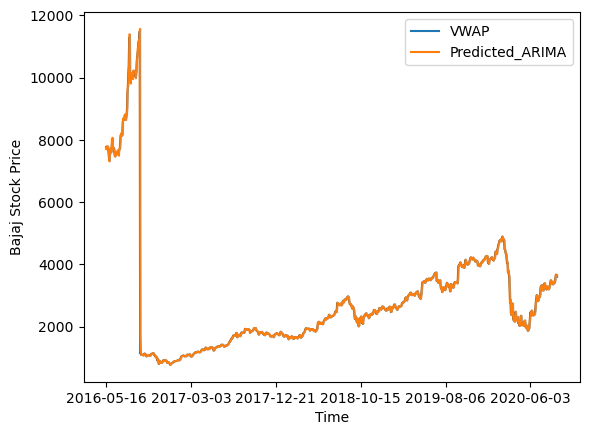

In [39]:
test['Predicted_ARIMA']=predictions

test[['VWAP', 'Predicted_ARIMA']].plot()
mlt.xlabel('Time')
mlt.ylabel('Bajaj Stock Price')